# Usage


To use PDB Manip Python in a project:

In [1]:
from pdb_manip_py import pdb_manip
pdb_manip.show_log()

## Create a ``Coor()`` object

You can either get the coordinates from the Protein Data Bank:

In [2]:
coor_1hsg = pdb_manip.Coor()
coor_1hsg.get_PDB('1hsg')

Succeed to read file 1hsg.pdb ,  1686 atoms found


Or load a local stored file:

In [3]:
coor_1hsg = pdb_manip.Coor('./1hsg.pdb')

Succeed to read file 1hsg.pdb ,  1686 atoms found


## Extract selection of coordinates

You can extract a selection of coordinates, here we will use the `1hsg.pdb` PDB file and extract the coordinates of L-735,524 an inhibitor of the HIV proteases (resname ``MK1``):

In [4]:
# Select res_name MK1
lig_coor = coor_1hsg.select_part_dict(selec_dict={'res_name': ['MK1']})

The obtain selection can be saved using the ``write_pdb()`` function:

In [5]:
# Save the ligand coordinates
lig_coor.write_pdb('1hsg_lig.pdb')

Succeed to save file 1hsg_lig.pdb


For selection you can use :

- ``name`` for atom name
- ``alter_loc`` alternative location
- ``res_name`` residue name
- ``chain`` chain ID
- ``res_num`` residue number
- ``uniq_resid`` a unique residue number starting from 0
- ``insert_res`` insert residue
- ``xyz`` x, y, z, coordinates
- ``occ`` occupation
- ``beta`` beta factor

Selector can be combined, *eg.* to select residue names Proline and Alanine from chain A you can use:

In [6]:
PRO_ALA_A_coor = coor_1hsg.select_part_dict(
    selec_dict={'res_name': ['PRO', 'ALA'], 'chain': ['A']})

### *note:*

To select protein atoms you can use the PROTEIN_AA variable containing protein residue name, giving this selector:

    selec_dict={'res_name': pdb_manip.PROTEIN_AA)}

## Visualize coordinates in pseudo 3D

- using matplotlib
- Inspired from sokrypton in https://github.com/sokrypton/ColabFold

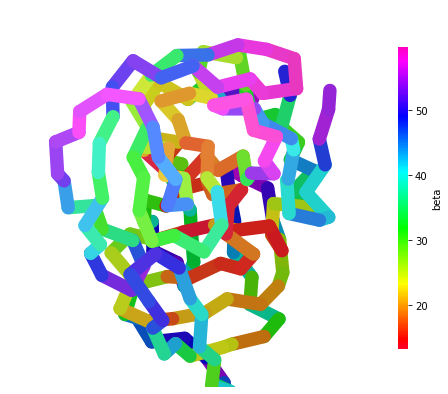

In [7]:
_ = coor_1hsg.plot_pseudo_3D('beta')

## Visualize coordinates in 3D

You can use the ``nglview`` library to vizualise in 3D your protein.

In [8]:
view = coor_1hsg.view
view

_ColormakerRegistry()

NGLWidget()

In [9]:
import nglview as nv
nv.write_html('../_static/1hsg.html', [view])

In [10]:
from IPython.display import IFrame

In [11]:
IFrame(src='../_static/1hsg.html', width=600, height=300)